In [2]:
import pandas as pd
import datetime
import pandas as  pd
import math
import folium
import json
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np
import time

from sklearn.linear_model import LinearRegression
import folium
import tensorflow as tf

C:\Users\B-17\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#한글 안깨지는 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:

tra_origin=pd.read_csv("data/traffic2017_201905_with_position.csv", encoding="utf-8")

In [6]:
tra=tra_origin[(tra_origin['일자']>=20180601) & (tra_origin['일자']<=20180930)]

In [7]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 1032 to 243265
Data columns (total 23 columns):
Unnamed: 0     32940 non-null int64
일자             32940 non-null float64
요일             32940 non-null object
지점명            32940 non-null object
지점번호           32940 non-null object
구분             32940 non-null object
방향             32940 non-null object
8시             28241 non-null float64
9시             28014 non-null float64
10시            27874 non-null float64
11시            28003 non-null float64
12시            28158 non-null float64
13시            28110 non-null float64
14시            28131 non-null float64
15시            28126 non-null float64
16시            28132 non-null float64
17시            28103 non-null float64
18시            28127 non-null float64
19시            28054 non-null float64
20시            28277 non-null float64
total          26995 non-null float64
Latitude_y     32940 non-null float64
Longitude_y    32940 non-null float64
dtypes: float64(17),

In [8]:
tra=tra[['일자', '요일', '지점명', '지점번호', '구분','total', 'Latitude_y', 'Longitude_y']]

In [9]:
tra['일자']=tra['일자'].astype(int)

In [10]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 1032 to 243265
Data columns (total 8 columns):
일자             32940 non-null int32
요일             32940 non-null object
지점명            32940 non-null object
지점번호           32940 non-null object
구분             32940 non-null object
total          26995 non-null float64
Latitude_y     32940 non-null float64
Longitude_y    32940 non-null float64
dtypes: float64(3), int32(1), object(4)
memory usage: 2.1+ MB


In [11]:
tra.head()

,일자,요일,지점명,지점번호,구분,total,Latitude_y,Longitude_y
1032,20180601,금,성산로(금화터널),A-01,유입,27737.0,37.56928,126.9518
1033,20180602,토,성산로(금화터널),A-01,유입,25091.0,37.56928,126.9518
1034,20180603,일,성산로(금화터널),A-01,유입,20506.0,37.56928,126.9518
1035,20180604,월,성산로(금화터널),A-01,유입,26432.0,37.56928,126.9518
1036,20180605,화,성산로(금화터널),A-01,유입,27736.0,37.56928,126.9518


In [12]:
gtra=tra.groupby(['일자','지점번호']).sum()

In [13]:
gtra['Latitude_y']=gtra['Latitude_y'].apply(lambda x : x/2 )

In [14]:
gtra['Longitude_y']=gtra['Longitude_y'].apply(lambda x : x/2 )

In [15]:
gtra.head()

total  Latitude_y  Longitude_y
일자       지점번호                                  
20180601 A-01  52082.0    37.56928     126.9518
         A-02  56674.0    37.57299     126.9662
         A-03  24491.0    37.58925     126.9714
         A-04  10742.0    37.59691     126.9876
         A-05      0.0    37.57651     126.9876

In [16]:
gtra.reset_index(inplace=True)

In [17]:
gtra.head()

,일자,지점번호,total,Latitude_y,Longitude_y
0,20180601,A-01,52082.0,37.56928,126.9518
1,20180601,A-02,56674.0,37.57299,126.9662
2,20180601,A-03,24491.0,37.58925,126.9714
3,20180601,A-04,10742.0,37.59691,126.9876
4,20180601,A-05,0.0,37.57651,126.9876


In [18]:
gtra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16470 entries, 0 to 16469
Data columns (total 5 columns):
일자             16470 non-null int64
지점번호           16470 non-null object
total          16470 non-null float64
Latitude_y     16470 non-null float64
Longitude_y    16470 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 643.4+ KB


In [19]:
gtra.isnull().sum()

일자             0
지점번호           0
total          0
Latitude_y     0
Longitude_y    0
dtype: int64

In [20]:
gtra['일자']=gtra['일자'].astype(str)

In [21]:
gtra.head()

,일자,지점번호,total,Latitude_y,Longitude_y
0,20180601,A-01,52082.0,37.56928,126.9518
1,20180601,A-02,56674.0,37.57299,126.9662
2,20180601,A-03,24491.0,37.58925,126.9714
3,20180601,A-04,10742.0,37.59691,126.9876
4,20180601,A-05,0.0,37.57651,126.9876


In [22]:
gtra['일자'].iloc[0][0:4]

'2018'

In [23]:
gtra['일자_dt']=gtra['일자'].apply(lambda x: datetime.datetime.strptime(x,'%Y%m%d'))

In [24]:
gtra['dayofweek']=gtra['일자_dt'].apply(lambda x : x.weekday())

In [25]:
gtra.head()

,일자,지점번호,total,Latitude_y,Longitude_y,일자_dt,dayofweek
0,20180601,A-01,52082.0,37.56928,126.9518,2018-06-01,4
1,20180601,A-02,56674.0,37.57299,126.9662,2018-06-01,4
2,20180601,A-03,24491.0,37.58925,126.9714,2018-06-01,4
3,20180601,A-04,10742.0,37.59691,126.9876,2018-06-01,4
4,20180601,A-05,0.0,37.57651,126.9876,2018-06-01,4


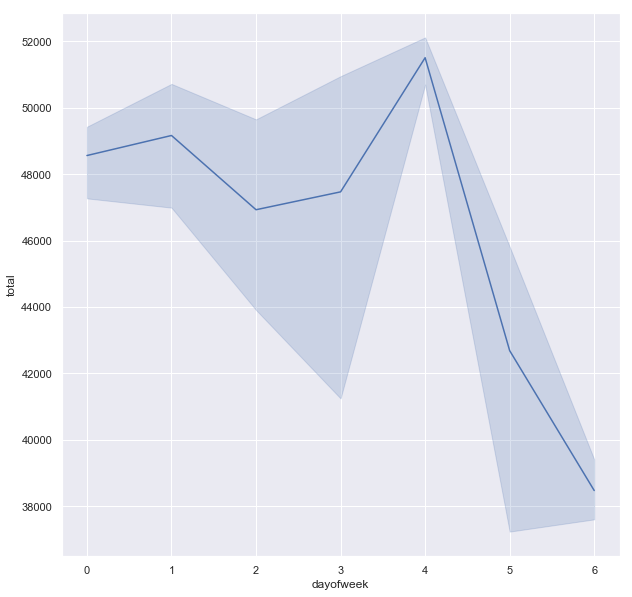

In [26]:
a01 = gtra[gtra['지점번호']=='A-01']
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.lineplot(x="dayofweek", y="total", data=a01)

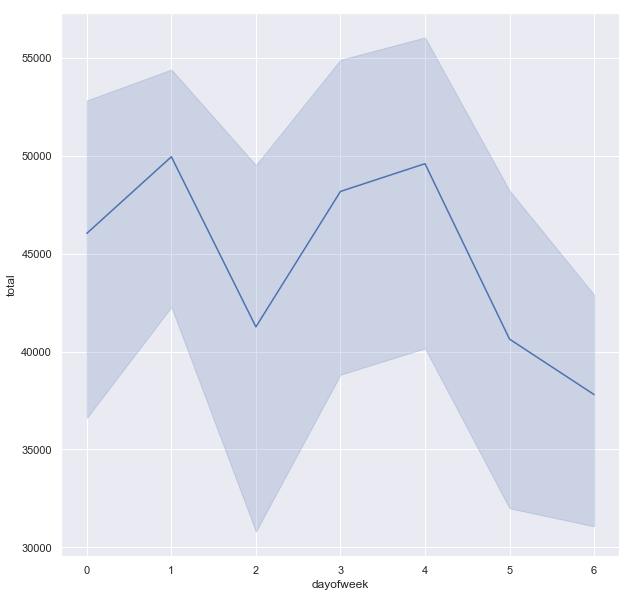

In [27]:
a02 = gtra[gtra['지점번호']=='A-02']
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.lineplot(x="dayofweek", y="total", data=a02)

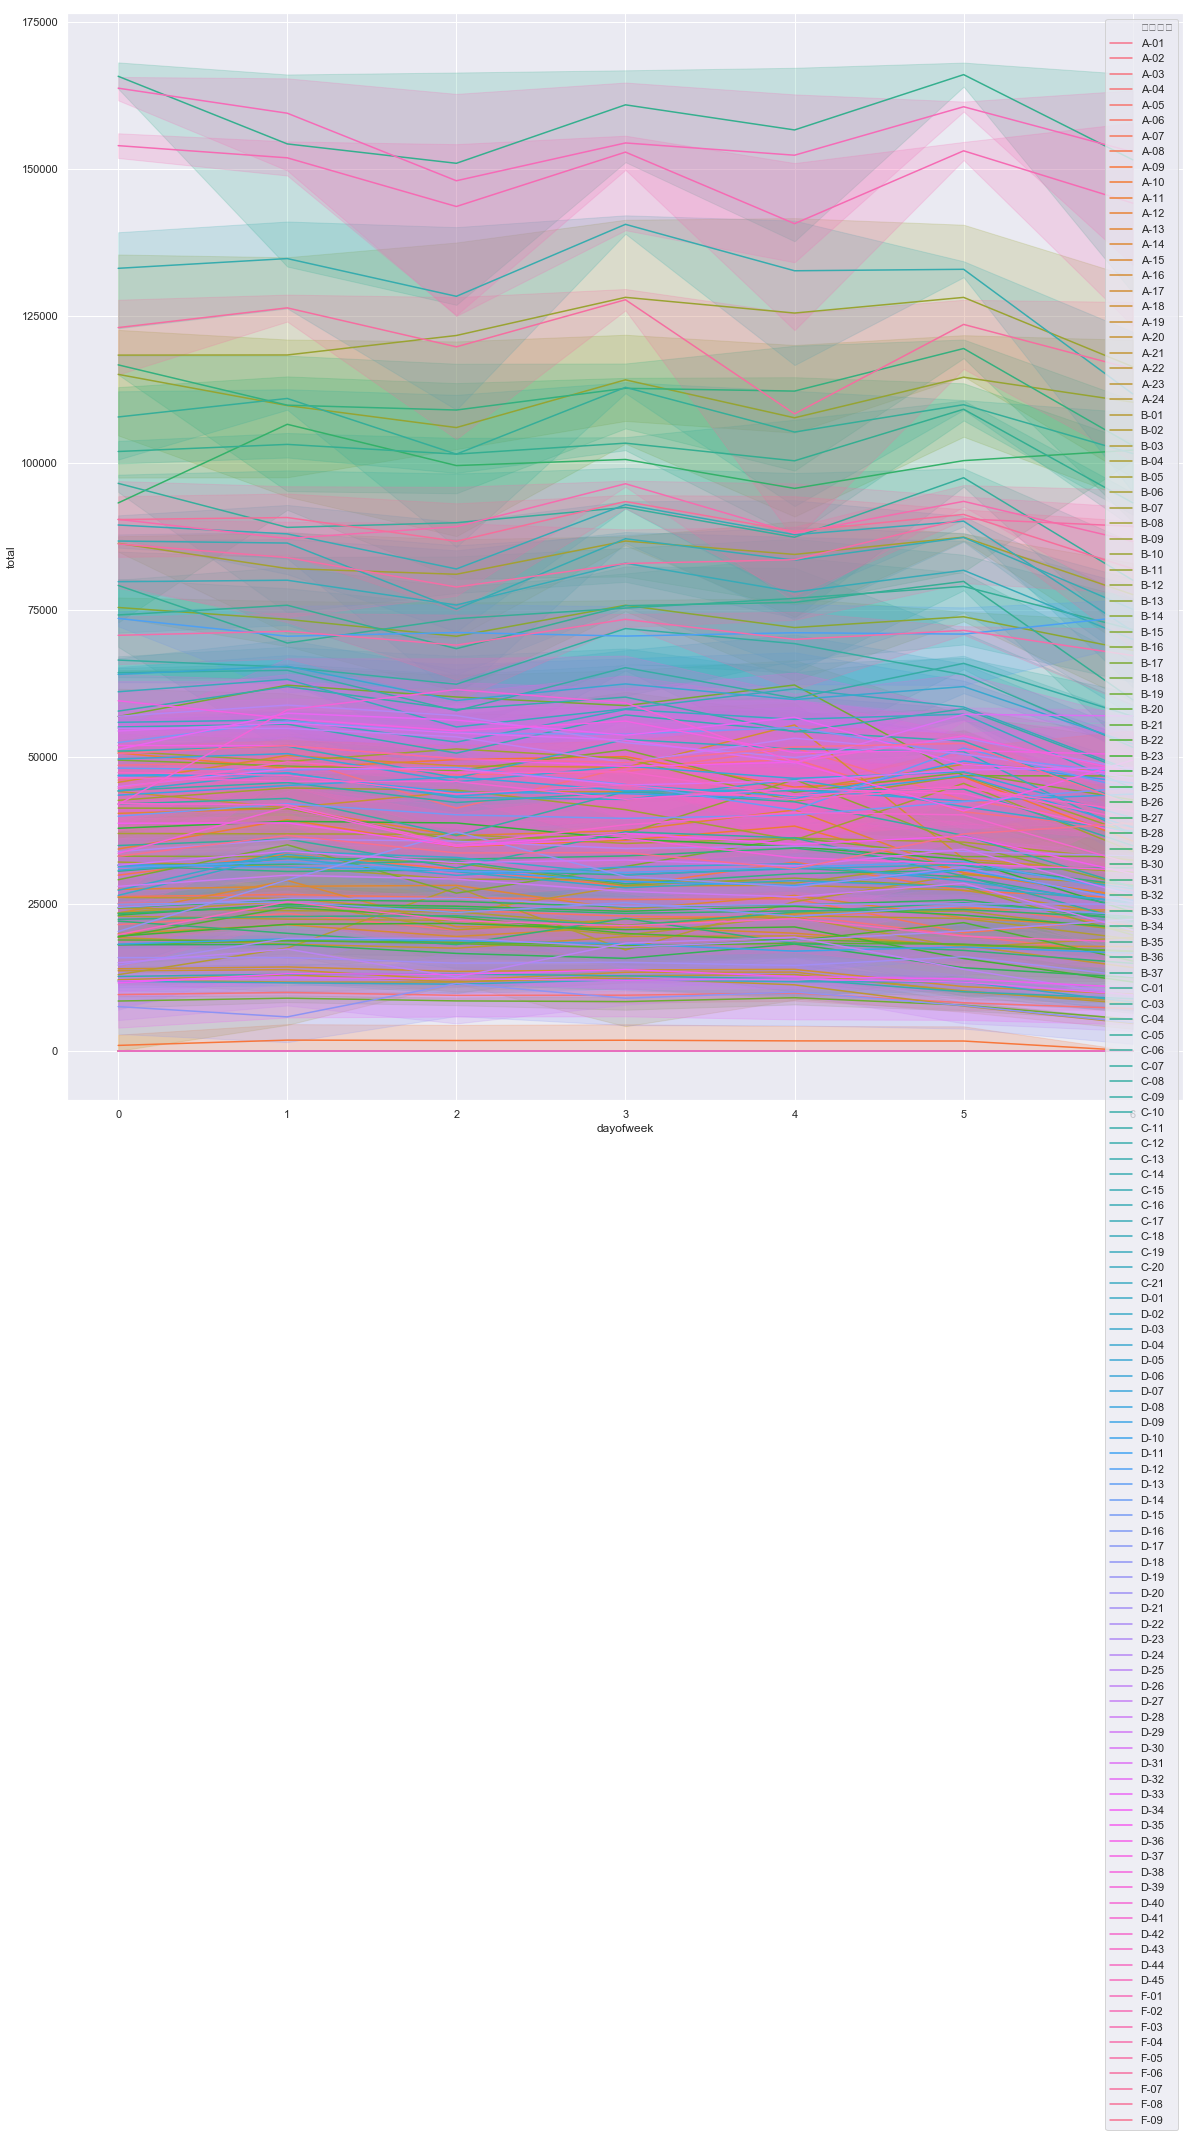

In [28]:
sns.set(rc={'figure.figsize':(20,20)})
ax=sns.lineplot(x="dayofweek", y="total", hue="지점번호", data=gtra)

In [29]:
Lat_data=gtra['Latitude_y'].values
Long_data=gtra['Longitude_y'].values
total_data=gtra['total'].values

In [30]:
xdata=gtra[['Latitude_y','Longitude_y']].values

In [31]:
xdata.shape

(16470, 2)

In [32]:
xdata[0]

array([ 37.56928, 126.9518 ])

In [33]:
ydata=gtra[['total']].values

In [34]:
ydata.shape

(16470, 1)

In [35]:
# Session 생성
sess=tf.Session()

# variable 정의, x, y의 shape 항상 지정해주기
x = tf.placeholder(dtype=tf.float32, shape=[None,2]) # None: "정해지지 않았음"을 의미한다(얼마인지 모른다...)
y = tf.placeholder(dtype=tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([2,1])) # 2x1 행렬로 만들어라...
b = tf.Variable(tf.random_normal([1]))

# 가설함수 노드생성
hf = tf.matmul(x, W)+b

# cost 값을 저장하는 노드 생성
cost= tf.reduce_mean(tf.square(hf-y))

optimizer=tf.train.GradientDescentOptimizer(1e-5)
train=optimizer.minimize(cost)

# Running to Initialize Values...
sess.run(tf.global_variables_initializer())


# Trainning Model
for step in range(3001):
    _,wv,bv,cv = sess.run([train, W, b, cost], feed_dict={x: xdata, y:ydata})
    # train 은 모델이기 때문에 return value가 존재하지 않는다.
    
    if step%200 == 0:
        print("step : ",step," || W value : ",wv," || b value : ",bv," || cost : ",cv)


Instructions for updating:
Colocations handled automatically by placer.
step :  0  || W value :  [[ 32.79157]
 [110.95855]]  || b value :  [1.8418818]  || cost :  3166448000.0
step :  200  || W value :  [[ 93.05116]
 [316.94598]]  || b value :  [3.452856]  || cost :  1250498000.0
step :  400  || W value :  [[ 92.463715]
 [317.11975 ]]  || b value :  [3.4430337]  || cost :  1250497800.0
step :  600  || W value :  [[ 91.87625]
 [317.2935 ]]  || b value :  [3.433211]  || cost :  1250497500.0
step :  800  || W value :  [[ 91.288795]
 [317.46725 ]]  || b value :  [3.4233892]  || cost :  1250497300.0
step :  1000  || W value :  [[ 90.70134]
 [317.64102]]  || b value :  [3.4135668]  || cost :  1250497300.0
step :  1200  || W value :  [[ 90.11389]
 [317.81476]]  || b value :  [3.4037447]  || cost :  1250497000.0
step :  1400  || W value :  [[ 89.52643]
 [317.98853]]  || b value :  [3.3939223]  || cost :  1250496600.0
step :  1600  || W value :  [[ 88.93898]
 [318.1623 ]]  || b value :  [3.3841

In [40]:
testX = np.array([[37.553809, 126.980921]])

In [41]:
testX.shape

(1, 2)

In [42]:
print(sess.run( hf, feed_dict={x:testX}))

[[43743.867]]


In [43]:
gtra['total'].value_counts()

0.0         2205
33849.0        5
23683.0        4
25954.0        4
25546.0        4
23874.0        4
32816.0        4
47062.0        4
30425.0        4
33704.0        3
64644.0        3
32104.0        3
34011.0        3
25952.0        3
24383.0        3
48369.0        3
26569.0        3
66897.0        3
44217.0        3
34508.0        3
12980.0        3
18371.0        3
34139.0        3
25261.0        3
31014.0        3
33511.0        3
58195.0        3
33128.0        3
45779.0        3
48978.0        3
            ... 
92596.0        1
23028.0        1
109130.0       1
32379.0        1
51837.0        1
33453.0        1
36137.0        1
9354.0         1
56707.0        1
44333.0        1
24325.0        1
42564.0        1
88665.0        1
66724.0        1
30512.0        1
9547.0         1
61038.0        1
35452.0        1
27486.0        1
109139.0       1
34091.0        1
19902.0        1
57012.0        1
22107.0        1
44688.0        1
25448.0        1
88660.0        1
36318.0       